In [31]:
# importing necessary packages

import numpy as np    #linear algebra
import pandas as pd   #data processing
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style = 'ticks', color_codes = True)
'''
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
'''

In [2]:
import os
print(os.listdir('../Walmart/'))

['.ipynb_checkpoints', 'features.csv', 'sampleSubmission.csv', 'stores.csv', 'test.csv', 'train.csv', 'Walmart sales forecast.ipynb']


In [48]:
train = pd.read_csv('../Walmart/train.csv', names = ['Store','Dept','Date','Weekly_Sales','IsHoliday'], sep = ',', header = 0)
features = pd.read_csv('../Walmart/features.csv', sep = ',', header = 0, names = ['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns = ['IsHoliday'])
stores = pd.read_csv('../Walmart/stores.csv', names = ['Store','Type','Size'], sep = ',', header = 0)

dataset = train.merge(stores, how = 'left').merge(features, how = 'left')

dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808


In [50]:
for col in dataset.columns: 
    print(col)

Store
Dept
Date
Weekly_Sales
IsHoliday
Type
Size
Temperature
Fuel_Price
MarkDown1
MarkDown2
MarkDown3
MarkDown4
MarkDown5
CPI
Unemployment


## Data exploration and visualization

In [18]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column], dataset['Weekly_Sales'])
    plt.ylabel('Weekly_sales')
    plt.xlabel(column)

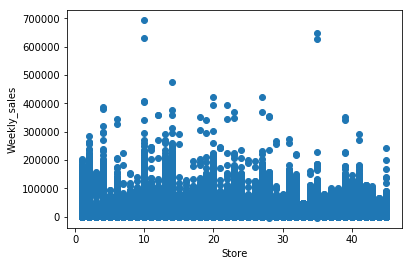

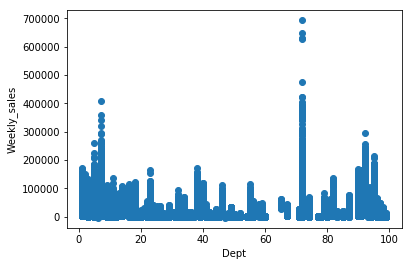

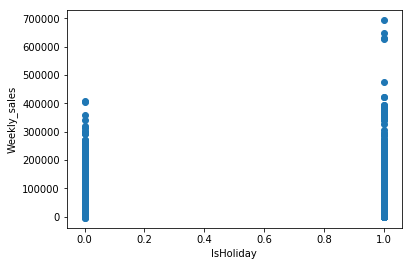

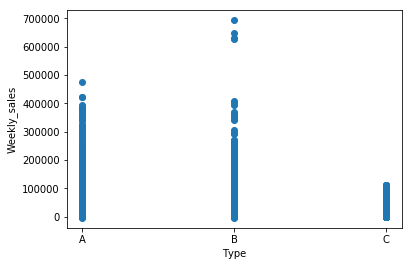

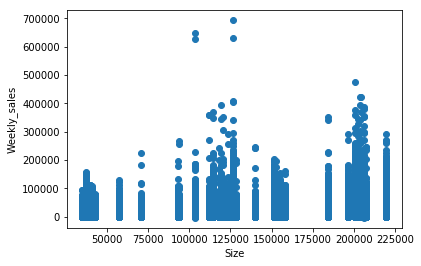

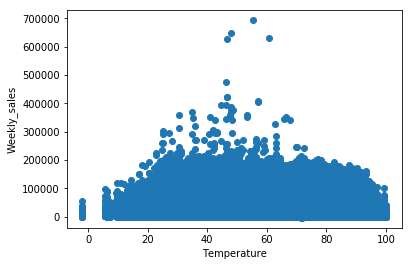

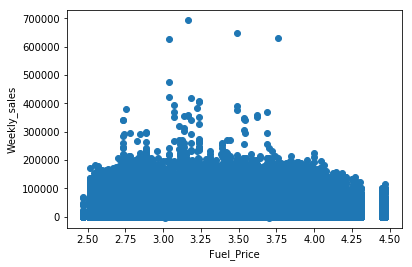

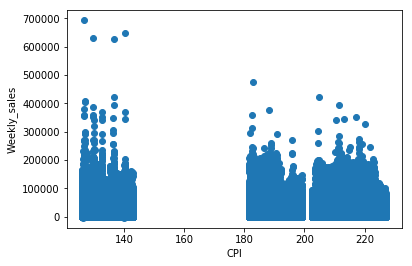

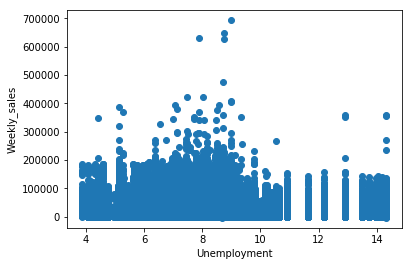

In [19]:
scatter(dataset, 'Store')
scatter(dataset, 'Dept')
scatter(dataset, 'IsHoliday')
scatter(dataset, 'Type')
scatter(dataset, 'Size')
scatter(dataset, 'Temperature')
scatter(dataset, 'Fuel_Price')
scatter(dataset, 'CPI')
scatter(dataset, 'Unemployment')

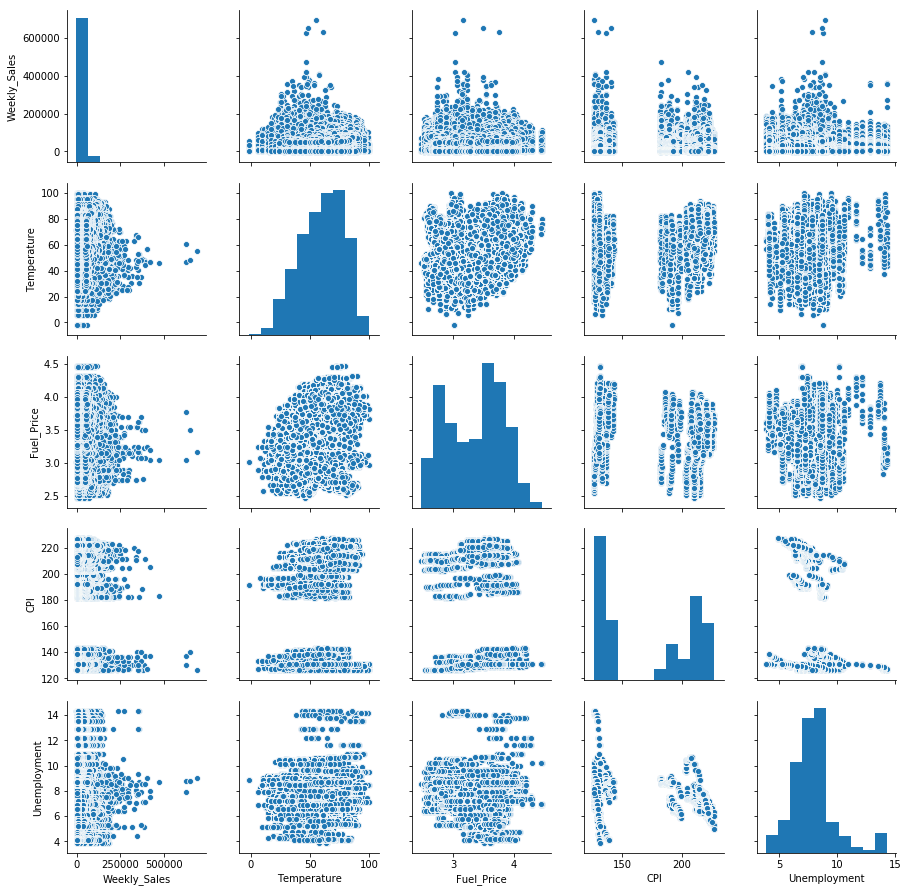

In [21]:
sns.pairplot(dataset, vars = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment'])

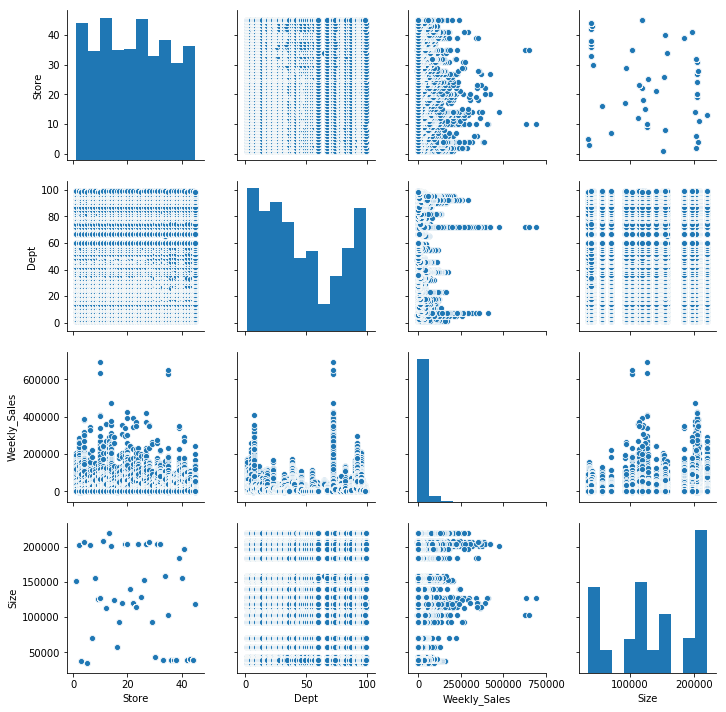

In [27]:
sns.pairplot(dataset.fillna(0), vars = ['Store','Dept','Weekly_Sales','Size'])

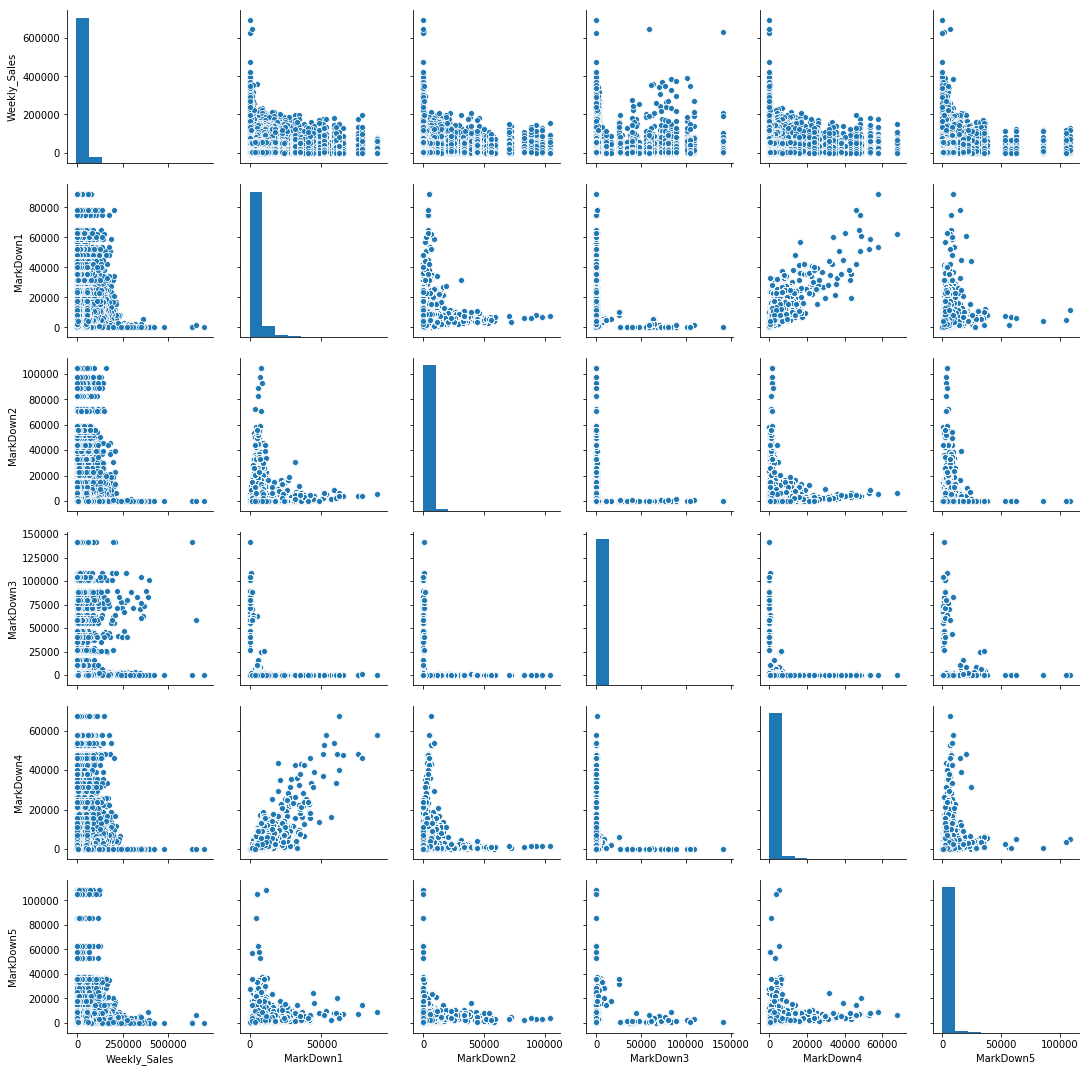

In [25]:
sns.pairplot(dataset.fillna(0), vars = ['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

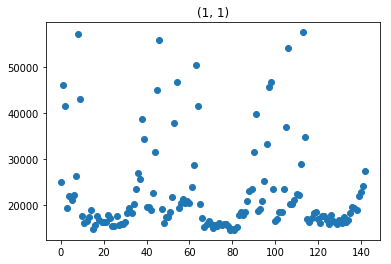

In [29]:
for name, group in dataset.groupby(["Store", "Dept"]):
    plt.title(name)
    plt.scatter(range(len(group)), group["Weekly_Sales"])
    plt.show()
    break

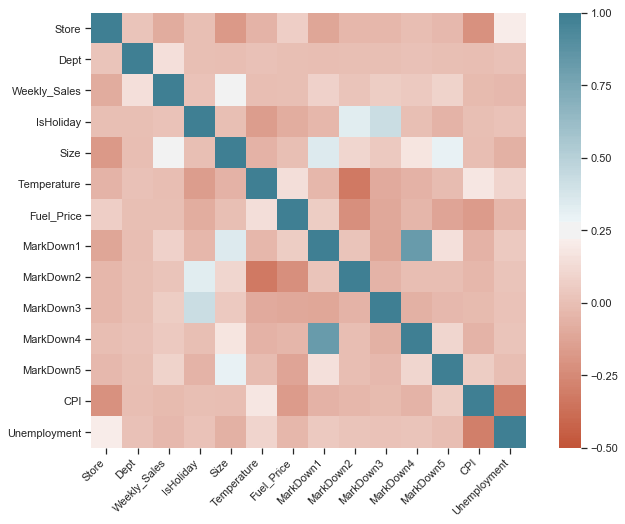

In [59]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(
    corr, 
    vmin=-0.5, vmax=1, center=0.25,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

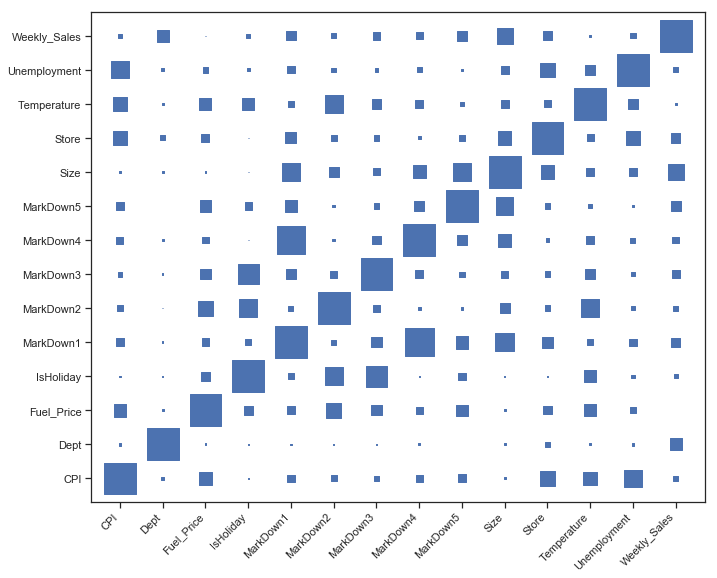

In [56]:
def heatmap(x, y, size):
    fig, ax = plt.subplots(figsize = (11,9))

    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 1000

    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
columns = ['Store','Dept','Weekly_Sales','IsHoliday','Type','Size','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'] 
corr = dataset[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)